## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_pymaceuticals = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_pymaceuticals.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = combined_pymaceuticals["Mouse ID"].count()
num_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
num_unique_mice = len(combined_pymaceuticals["Mouse ID"].unique())
print("The number of unique mice is: " + str(num_unique_mice))

print("\nDuplicate Mice: ")
duplicate_mice = combined_pymaceuticals[combined_pymaceuticals.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

The number of unique mice is: 249

Duplicate Mice: 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


@TODO there are only five duplicates?

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_pymaceuticals.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')

@TODO okay to just use drop_duplicates?

In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_mice_df["Mouse ID"].count()
num_mice_clean

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_groups = clean_mice_df.groupby("Drug Regimen")
mean1 = regimen_groups['Tumor Volume (mm3)'].mean()
median1 = regimen_groups['Tumor Volume (mm3)'].median()
variance1 = regimen_groups['Tumor Volume (mm3)'].var()
standard_deviation1 = regimen_groups['Tumor Volume (mm3)'].std()
SEM1 = regimen_groups['Tumor Volume (mm3)'].sem()

summary_stats1 = pd.DataFrame({'Mean of tumor volume': mean1,
                              'Median of tumor volume': median1,
                              'Variance of tumor volume': variance1,
                              'Standard Deviation of tumor volume': standard_deviation1,
                              'SEM of tumor volume': SEM1})
summary_stats1

,Mean of tumor volume,Median of tumor volume,Variance of tumor volume,Standard Deviation of tumor volume,SEM of tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

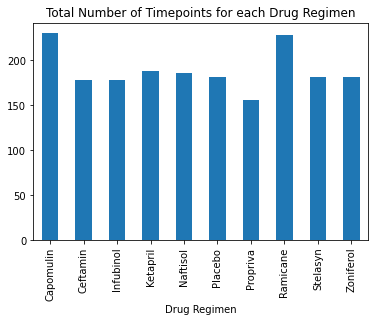

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_timepoints = clean_mice_df.groupby('Drug Regimen')['Timepoint'].count()

pandas_timepoints_bar = regimen_timepoints.plot(kind='bar', x='Drug Regimen', y='Total Number of Timepoints',
                                               title='Total Number of Timepoints for each Drug Regimen')

@TODO check understanding for_bar charts

@TODO total number of timepoints for_each drug regimen?

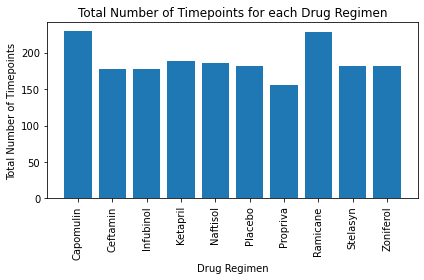

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(clean_mice_df['Drug Regimen'].unique()))
tick_locations = [x for x in x_axis]

counting_df = clean_mice_df.groupby('Drug Regimen').count().reset_index()

plt.title('Total Number of Timepoints for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')

plt.bar(x_axis, counting_df['Timepoint'], align='center')
plt.xticks(tick_locations, counting_df['Drug Regimen'], rotation='vertical')
plt.tight_layout()
plt.show()

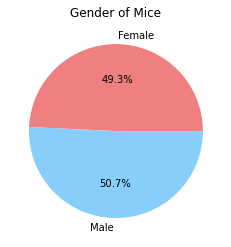

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# not getting unique mice first
gender_mice_counts = clean_mice_df.groupby('Sex').count()
pandas_gender_pie = gender_mice_counts.plot(kind='pie', y='Mouse ID', autopct='%1.1f%%',
                                           colors=['lightcoral', 'lightskyblue'],
                                           title='Gender of Mice', legend=False, ylabel='')


@TODO do we get the unique mice first?

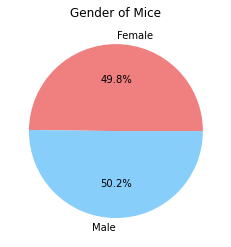

In [12]:
# getting unique mice first

unique_mouse_id = combined_pymaceuticals[combined_pymaceuticals.duplicated('Mouse ID')]
unique_mice_df = combined_pymaceuticals.drop_duplicates('Mouse ID', keep='first')

gender_mice_count = unique_mice_df.groupby('Sex').count()

pandas_gender_pie = gender_mice_count.plot(kind='pie', y='Mouse ID', autopct='%1.1f%%',
                                           colors=['lightcoral', 'lightskyblue'],
                                           title='Gender of Mice', legend=False, ylabel='')

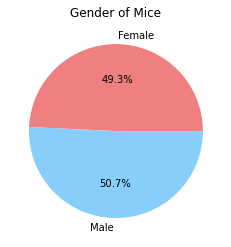

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# not getting unique mice first

gender_mice_counts_pyplot = gender_mice_counts.reset_index()

plt.title('Gender of Mice')
plt.pie(gender_mice_counts_pyplot['Mouse ID'], labels=gender_mice_counts_pyplot['Sex'], colors=['lightcoral', 'lightskyblue'],
       autopct="%1.1f%%")
plt.show()

In [14]:
gender_mice_count

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,124,124,124,124,124,124,124
Male,125,125,125,125,125,125,125


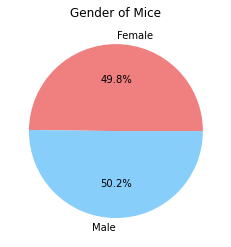

In [15]:
# getting unique mice first

gender_mice_count_pyplot = gender_mice_count.reset_index()

plt.title('Gender of Mice')
plt.pie(gender_mice_count_pyplot['Mouse ID'], labels=gender_mice_count_pyplot['Sex'], colors=['lightcoral', 'lightskyblue'],
       autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#group_mice_tps = clean_mice_df.sort_values('Timepoint', ascending=False).groupby('Mouse ID').first()

# if we need mouse id as a column
best_regimens = clean_mice_df.loc[(clean_mice_df['Drug Regimen'] == 'Capomulin') |
                                 (clean_mice_df['Drug Regimen'] == 'Ramicane') |
                                 (clean_mice_df['Drug Regimen'] == 'Infubinol') |
                                 (clean_mice_df['Drug Regimen'] == 'Ceftamin')]
group_mice_tps = best_regimens.sort_values('Timepoint', ascending=False).groupby('Mouse ID').first().reset_index()

group_mice_tps
#group_mice_tps = group_mice_tps.drop_duplicates('Mouse ID', keep='first')
#group_mice_tps.head()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [17]:
Ceftamin = group_mice_tps.loc[group_mice_tps['Drug Regimen'] == 'Ceftamin']
Ceftamin['Tumor Volume (mm3)'].max()

68.92318457

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint

@TODO confused about this part

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

@TODO do we get the quartiles from_ pandas or_ a diff way?

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in treatments:
    tumor_vol_list.append(group_mice_tps.loc[group_mice_tps['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].to_list())

    #tumor_vol_list
    
# add subset
bounds = []
for regimen in tumor_vol_list:
    quartiles = np.percentile(regimen, [25, 50, 75], interpolation='midpoint')
    iqr = quartiles[2] - quartiles[0]
    lower_bound = quartiles[0] - (1.5*iqr)
    upper_bound = quartiles[2] + (1.5*iqr)
    bounds.append([lower_bound, upper_bound])
bounds

# Determine outliers using upper and lower bounds
for i in range(4):
    outliers = group_mice_tps.loc[(group_mice_tps['Drug Regimen'] == treatments[i]) & 
                                ((group_mice_tps['Tumor Volume (mm3)'] < bounds[i][0]) |
                                 (group_mice_tps['Tumor Volume (mm3)'] > bounds[i][1]))]
    if not outliers.empty:
        print(f"The following mice are outliers for the treatment {treatments[i]} because their Tumor Volume is either ")
        print(f"less than {bounds[i][0]} or")
        print(f"greater than {bounds[i][1]}")
        display(outliers)


The following mice are outliers for the treatment Infubinol because their Tumor Volume is either 
less than 36.83290494999999 or
greater than 82.74144559000001


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
15,c326,Infubinol,Female,18,25,5,36.321346,0


@TODO what does add subset mean

In [19]:
tumor_vols = pd.DataFrame({'Capomulin': tumor_vol_list[0],
                        'Ramicane': tumor_vol_list[1],
                           'Infubinol': tumor_vol_list[2],
                           'Ceftamin': tumor_vol_list[3]})

Text(0, 0.5, 'Tumor volume (mm3)')

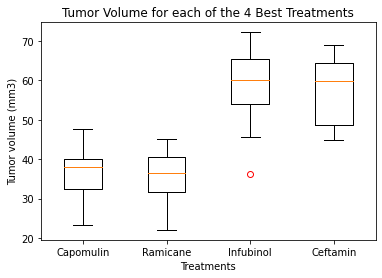

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', color='red', markeredgecolor='red')

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vols, flierprops=flierprops)

ax1.set_xticklabels(treatments)
plt.title("Tumor Volume for each of the 4 Best Treatments")
ax1.set_xlabel("Treatments")
ax1.set_ylabel("Tumor volume (mm3)")

## Line and Scatter Plots

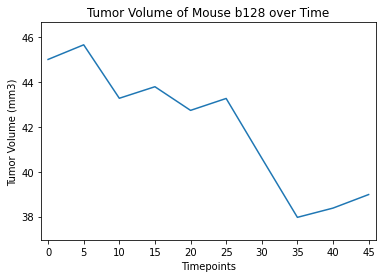

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Capomulin']
mouse = capomulin.sample(n=1, random_state=22)['Mouse ID'].to_list()

mouse_over_time = capomulin.loc[capomulin['Mouse ID'] == mouse[0]]
mouse_tumor_vol = mouse_over_time['Tumor Volume (mm3)'].to_list()
mouse_timepoint = mouse_over_time['Timepoint'].to_list()

plt.title("Tumor Volume of Mouse " + mouse[0] + " over Time")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(np.arange(min(mouse_timepoint), max(mouse_timepoint)+1, 5.0))
plt.xlim(-1, 46)
plt.ylim(min(mouse_tumor_vol)-1, max(mouse_tumor_vol)+1)
plt.plot(mouse_timepoint, mouse_tumor_vol)

plt.show()

In [51]:
mouse_over_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


@TODO do we need to use matplotlib here or does pandas' .plot work?

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter = capomulin.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()
capomulin_scatter

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for Capomulin regimen')

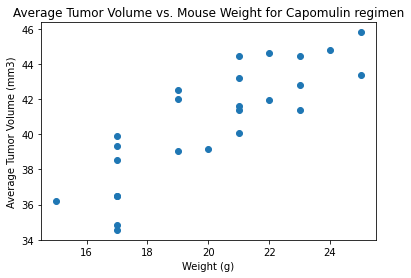

In [57]:
plt.scatter(capomulin_scatter.iloc[:,0], capomulin_scatter.iloc[:,1])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin regimen')

In [69]:
# checking that the weight doesn't change
testing = clean_mice_df.sample(n=1)['Mouse ID'].to_list()
test_mouse = clean_mice_df.loc[clean_mice_df['Mouse ID'] == testing[0]]
test_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1502,s187,Propriva,Male,22,25,0,45.000000,0
1503,s187,Propriva,Male,22,25,5,47.576718,1
1504,s187,Propriva,Male,22,25,10,48.146351,1
1505,s187,Propriva,Male,22,25,15,52.081632,1
1506,s187,Propriva,Male,22,25,20,53.744734,1
1507,s187,Propriva,Male,22,25,25,56.485220,1
1508,s187,Propriva,Male,22,25,30,60.008783,2


## Correlation and Regression

In [71]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin_scatter.iloc[:,0]
avg_vol = capomulin_scatter.iloc[:,1]
correlation = st.pearsonr(weight, avg_vol)
correlation

(0.841936342469472, 1.3225722434712483e-07)

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for Capomulin regimen')

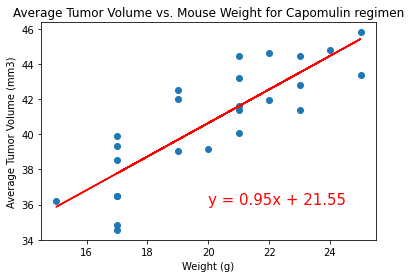

In [80]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_vol)
regress_values = weight * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight, avg_vol)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_equation, (20,36), fontsize=15, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin regimen')